In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# generate a dummy dataset
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(df, columns=['value']) 
df.head()   

,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [5]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


,value
count,1000.000000
mean,2.007080
std,2.059218
min,0.001092
25%,0.569010
50%,1.312952
75%,2.673183
max,17.122062


<Axes: xlabel='value', ylabel='Count'>

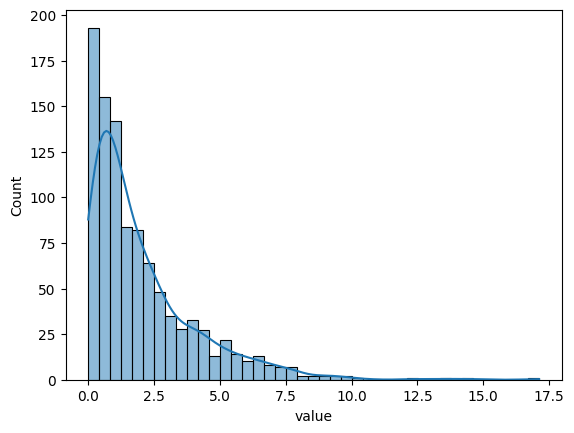

In [6]:
sns.histplot(df['value'], kde=True)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func=np.log1p)
df_transformed = ft.fit_transform(df)


pandas.core.frame.DataFrame

<Axes: xlabel='value', ylabel='Count'>

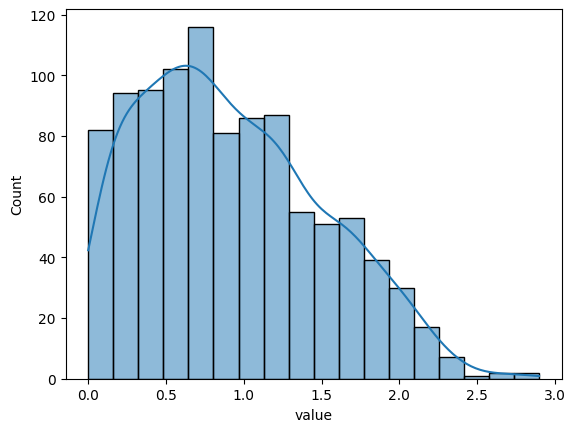

In [10]:
sns.histplot(df_transformed['value'], kde=True)

<Axes: title={'center': 'Transformed Data'}, xlabel='value', ylabel='Count'>

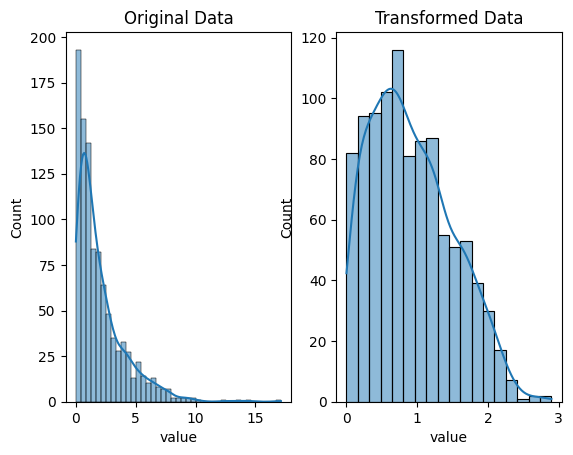

In [12]:
plt.subplot(1,2,1)
plt.title('Original Data')
sns.histplot(df['value'], kde=True)
plt.subplot(1,2,2)
plt.title('Transformed Data')  
sns.histplot(df_transformed['value'], kde=True) 

## Quantile transofrmation

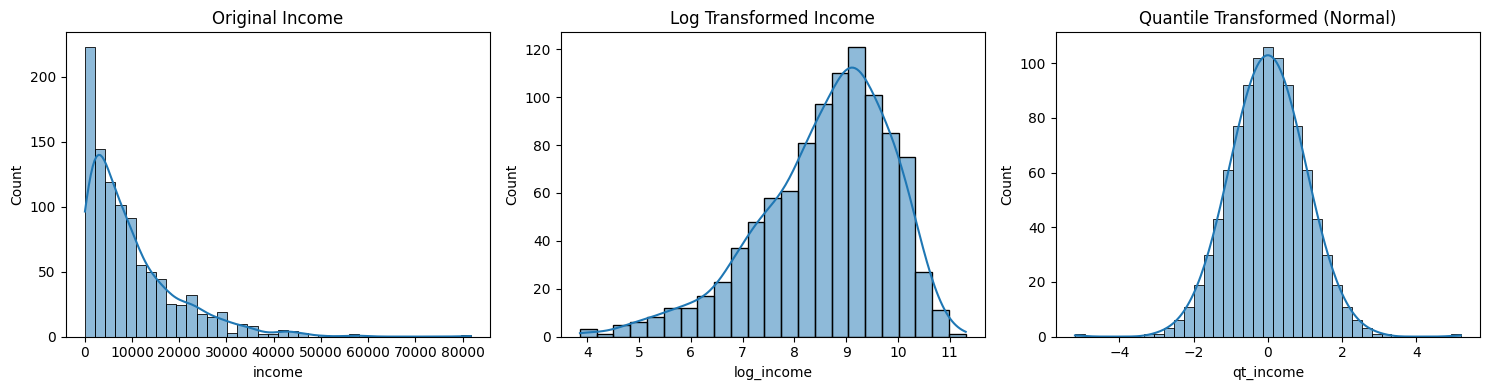

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Skewed data
np.random.seed(42)
data = pd.DataFrame({'income': np.random.exponential(scale=10000, size=1000)})

# Log transform
data['log_income'] = np.log1p(data['income'])

# Quantile transform to normal
qt = QuantileTransformer(output_distribution='normal')
data['qt_income'] = qt.fit_transform(data[['income']])

# Plot comparison
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(data['income'], kde=True)
plt.title("Original Income")

plt.subplot(1, 3, 2)
sns.histplot(data['log_income'], kde=True)
plt.title("Log Transformed Income")

plt.subplot(1, 3, 3)
sns.histplot(data['qt_income'], kde=True)
plt.title("Quantile Transformed (Normal)")

plt.tight_layout()
plt.show()
